In [11]:
import bql
import numpy as np
from IPython.display import display, clear_output
import pandas as pd
import time 
import datetime
from ipywidgets import *
from bqplot import *
from bqplot.interacts import *

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

bq = bql.Service()
d = bq.data
f = bq.func
u = bq.univ

In [12]:
# INPUTS ###############

cur_fut_idx = ['EC1 Curncy', 'BP1 Curncy', 'JY1 Curncy', 'AD1 Curncy', 'UC1 Curncy', 'DX1 Curncy', 'CD1 Curncy', 'RP1 Curncy', 'PE1 Curncy', 'SF1 Curncy',
               'GD1 Curncy', 'NV1 Curncy', 'RY1 Curncy', 'EE1 Curncy', 'RU1 Curncy', 'RA1 Curncy', 'BR1 Curncy']

index_universe = ['HFRIFOF Index'] + cur_fut_idx

start_date = datetime.datetime(2008,12,31)
end_date = datetime.datetime(2018,12,31)

In [13]:
def norm_corr(as1, as2, st_date, e_date):
    price = d.px_last(start = st_date, end = e_date, per = 'M', fill='prev')
    price = f.zscore(price)
    base_price = f.value(price, u.list(as1))
    correlation = f.corr(base_price, price)

    request = bql.Request(as2, {'Cor': correlation}, preferences={'currencycheck':'ignore'}) #There's an error with de currencies of these tickers. This way we "solve" the issue
    res = bq.execute(request)
    cor_res = res[0].df()
    
    return cor_res.iloc[0]['Cor']

def correlDist(corr):
    dist = ((1-corr)/2)**0.5
    return dist

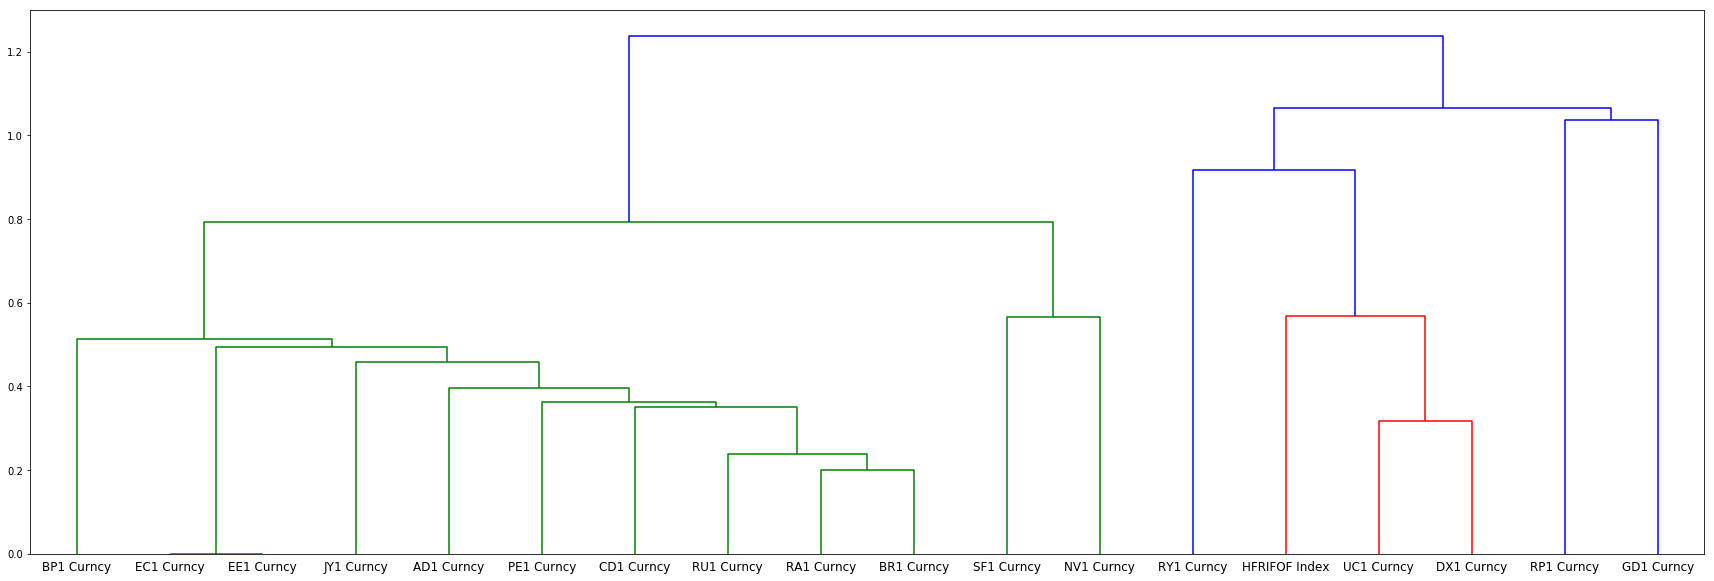

In [14]:
###############    MAIN    ###############

#Calculate Cluster
count = 0
for asset1 in index_universe:
    aux_cor_list=[]
    for asset2 in index_universe:
        aux_cor_list.append(norm_corr(asset1,asset2,start_date,end_date))
        
    if count == 0:
        Correl_Matrix = pd.DataFrame({asset1: pd.Series(aux_cor_list, index = index_universe)})
    else:
        aux_Correl_Matrix = pd.DataFrame({asset1: pd.Series(aux_cor_list, index = index_universe)})
        Correl_Matrix = pd.concat([Correl_Matrix, aux_Correl_Matrix],axis = 1)
        
    count += 1

Z = linkage(correlDist(Correl_Matrix))

plt.figure(figsize=(30, 10), facecolor='w')
dendrogram(Z, labels = index_universe)
plt.show()